# Hierarchical-K_means-DBSCAN

## Importing Libraries

In [1]:
import pandas as pd                                   #read dataset
import numpy as np                                    #help in array building    
import seaborn as sns                                 #visualizing data
import matplotlib.pylab as plt                        #visualizing data
from sklearn.preprocessing import StandardScaler, normalize      #standardization of data to balance the unit between different variables  
sns.set()
import scipy.cluster.hierarchy as sch                 #for creating dendrogram 
from sklearn.cluster import AgglomerativeClustering   #for Agglomerative is a hierarchical clustering method that applies the "bottom-up" approach to group the elements in a dataset. 
from sklearn.decomposition import PCA                 #We’ll employ PCA to reduce the number of features in our data set Dimensionality Reduction
from scipy.cluster.hierarchy import linkage           #Performs hierarchical/agglomerative clustering on the condensed distance matrix
from sklearn.cluster import KMeans                    #The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data.
from sklearn.cluster import DBSCAN                    #DBSCAN is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density. 
%matplotlib inline
from scipy import stats
from sklearn.metrics import silhouette_score
import matplotlib

## Importing Dataset

In [2]:
crime_data= pd.read_csv('crime_data.csv')
crime_data.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime_data.shape

(50, 5)

## Understanding dataset

The dataset is of 50 state of America crime data.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

## Working Problem

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Step1- EDA

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [6]:
#Check missing value
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
# Checking the percentage of missing values
round(100*(crime_data.isnull().sum()/len(crime_data.index)), 2)

Unnamed: 0    0.0
Murder        0.0
Assault       0.0
UrbanPop      0.0
Rape          0.0
dtype: float64

In [8]:
#There are no null value in our dataset
crime_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
#Rename columns
crime_data=crime_data.rename(columns={'Unnamed: 0':'State'})
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
# Check for rows containing duplicate
duplicate= crime_data[crime_data.duplicated()]
duplicate.shape

(0, 5)

<AxesSubplot:xlabel='Rape'>

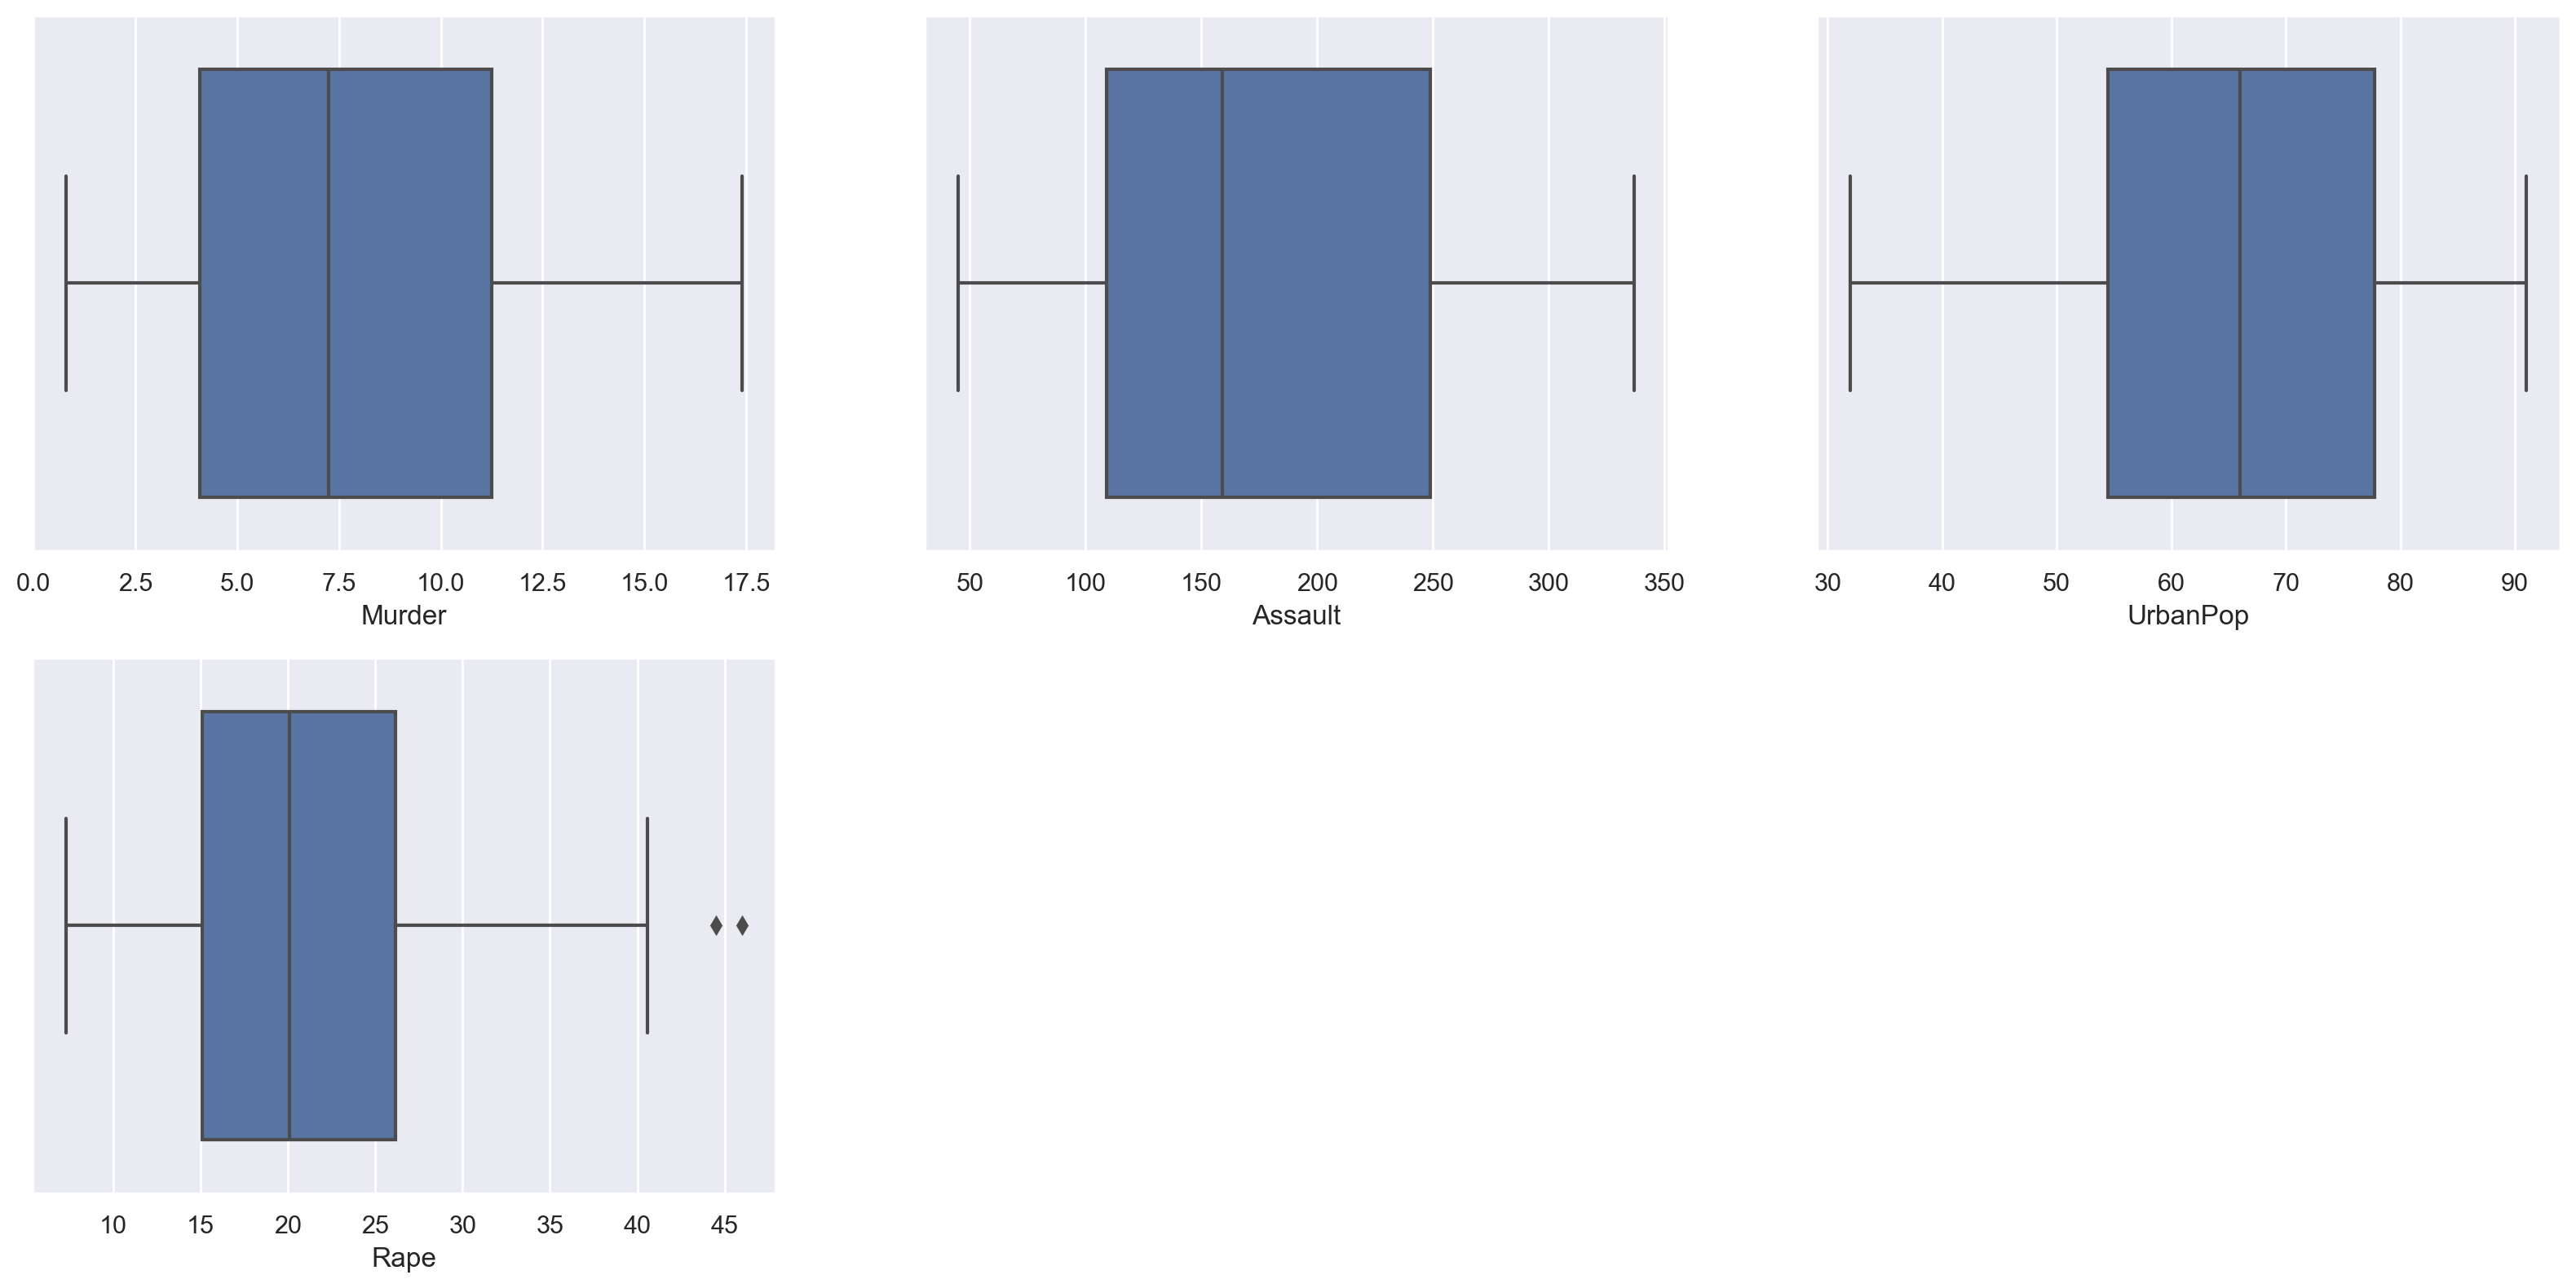

In [11]:
#Checking for outliers
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Murder', data = crime_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'Assault', data = crime_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'UrbanPop', data = crime_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'Rape', data = crime_data)

## Finding Outlier

In [12]:
#Finding outliers using Inter Quartile Range (IQR)
Q1= crime_data.Rape.quantile(0.25)
Q3= crime_data.Rape.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= crime_data.Rape>=upper_limit
print(np.where(upper))
lower= crime_data.Rape<=lower_limit
print(np.where(lower))

(array([ 1, 27], dtype=int64),)
(array([], dtype=int64),)


In [13]:
# Position of the Outlier
print(np.where(crime_data['Rape']>40))

(array([ 1,  4, 27], dtype=int64),)


In [14]:
#seeing the row data
result= crime_data.iloc[[ 1, 4, 27]]
result

,State,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
27,Nevada,12.2,252,81,46.0


Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. As these outliers are just little higher than the others, but we can keep it as our dataset volume is not high.  

<AxesSubplot:>

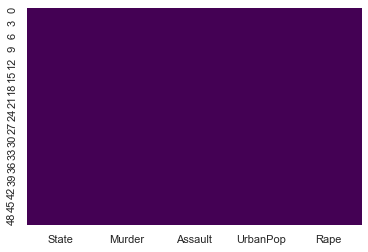

In [15]:
# Visualizing null values
sns.heatmap(crime_data.isnull(),cbar=False, cmap='viridis')

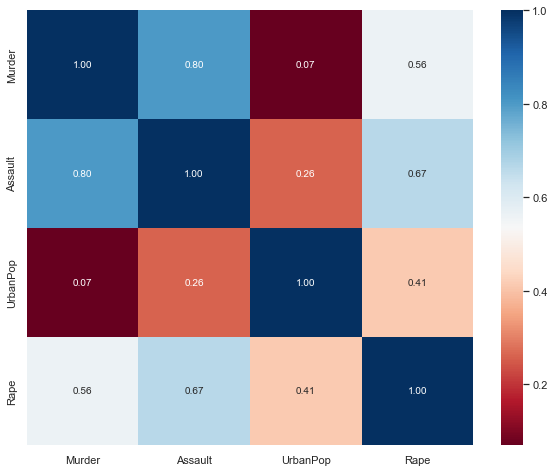

In [16]:
corr= crime_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='RdBu',fmt='.2f')
plt.show()

As from above heatmap we find Murder and Assault are highly correlated variables.

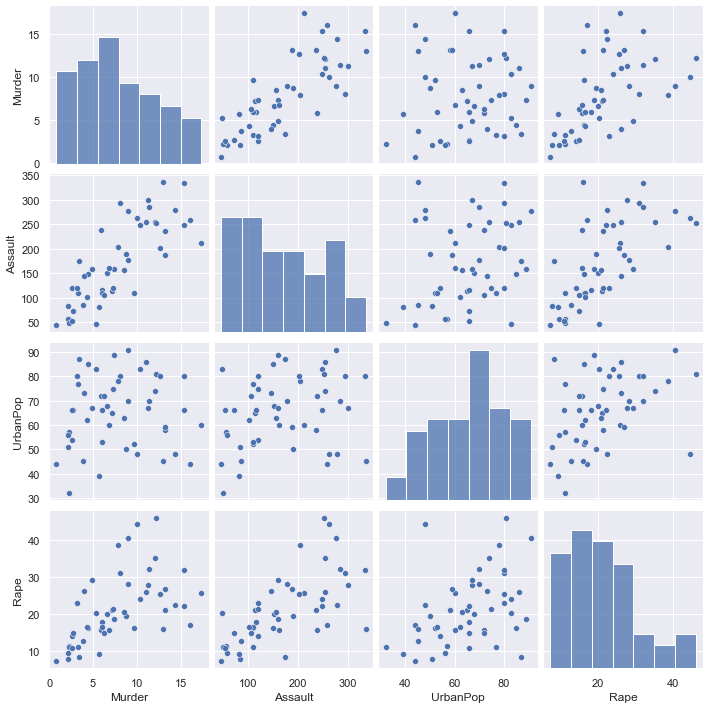

In [17]:
sns.pairplot(crime_data)

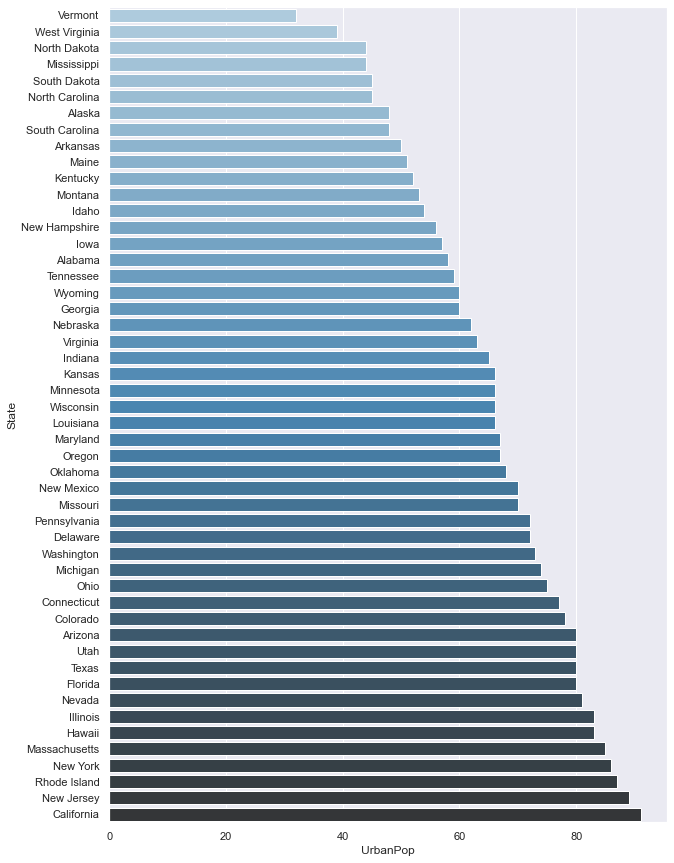

In [18]:
plt.figure(figsize=(10,15))
sns.barplot(y='State',x='UrbanPop',data=crime_data, order=crime_data.sort_values('UrbanPop').State, palette="Blues_d")
plt.show()

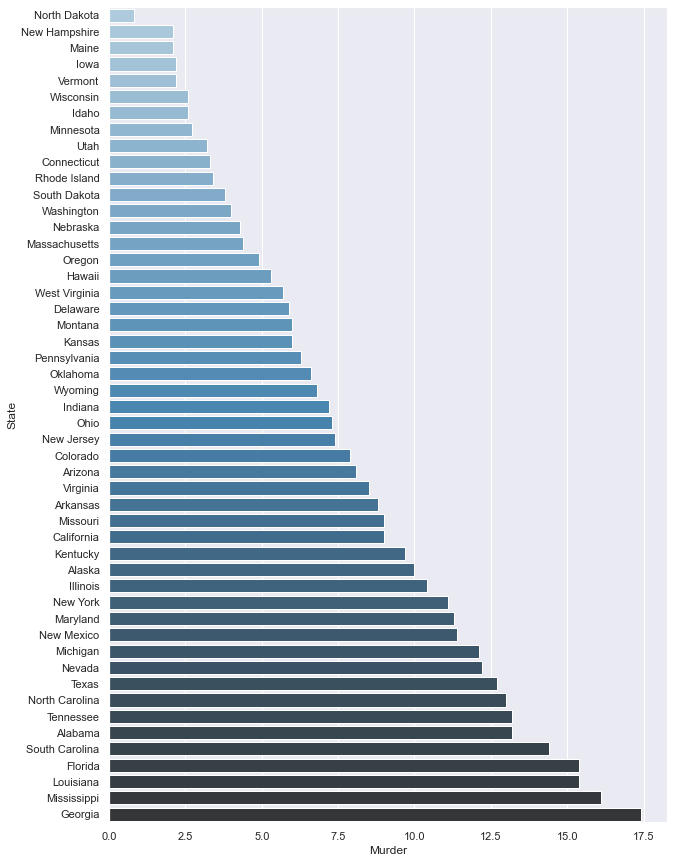

In [19]:
plt.figure(figsize=(10,15))
sns.barplot(y='State',x='Murder',data=crime_data, order=crime_data.sort_values('Murder').State, palette="Blues_d")
plt.show()

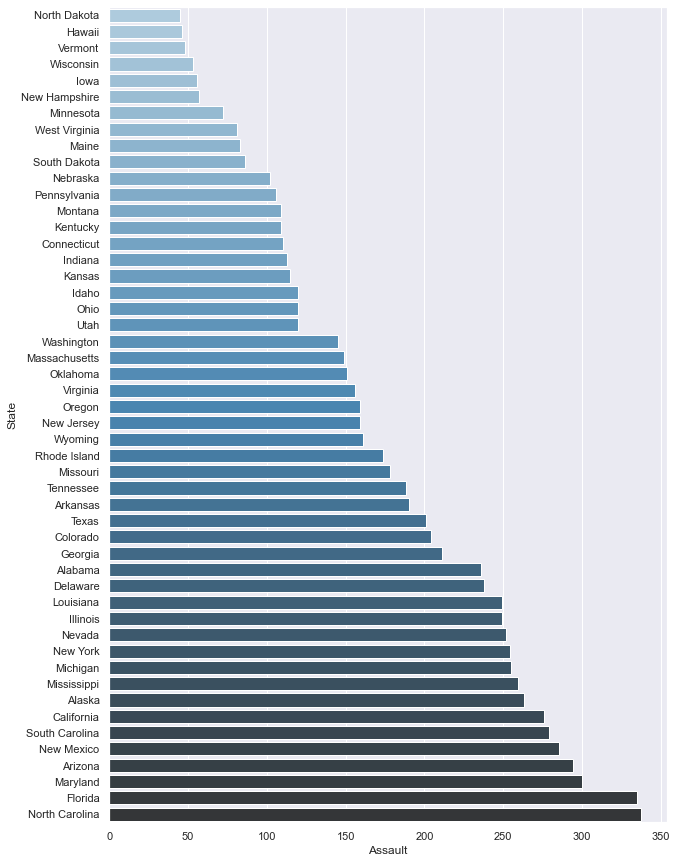

In [20]:
plt.figure(figsize=(10,15))
sns.barplot(y='State',x='Assault',data=crime_data, order=crime_data.sort_values('Assault').State, palette="Blues_d")
plt.show()

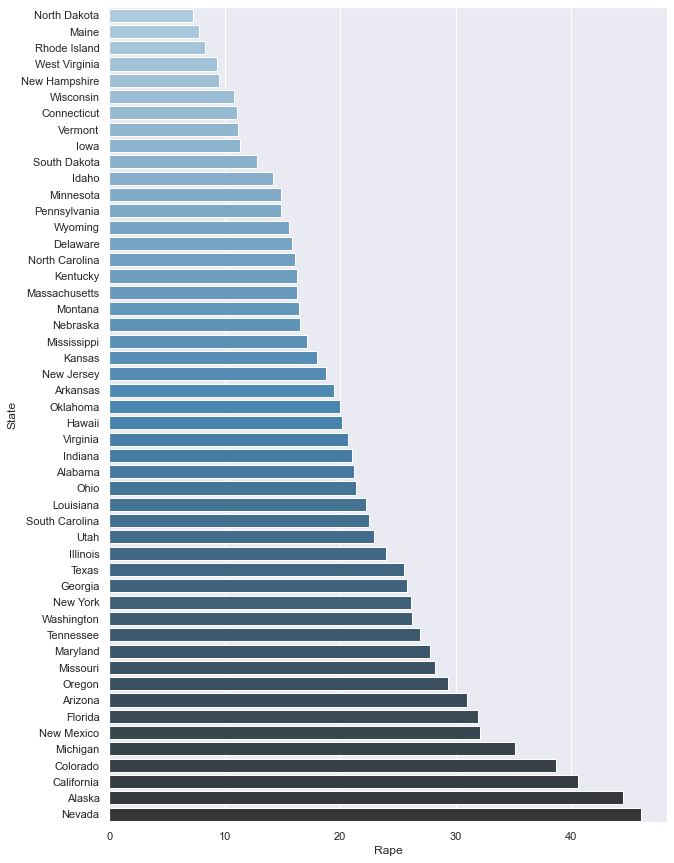

In [21]:
plt.figure(figsize=(10,15))
sns.barplot(y='State',x='Rape',data=crime_data, order=crime_data.sort_values('Rape').State, palette="Blues_d")
plt.show()

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

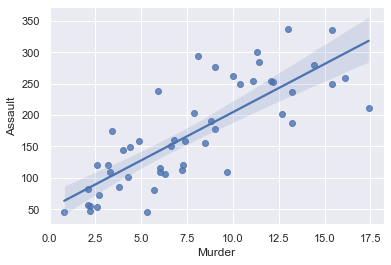

In [22]:
sns.regplot(x='Murder',y='Assault',data=crime_data)

Assault and Murder variables are correlated and are linear to each other so we will just work with one feature.

In [23]:
crime_data1= crime_data.copy()
crime_data1.head(5)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
crime_data1.drop(['State'],inplace=True,axis=1)
crime_data1.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Preprocessing the data

In [25]:
## Scaling the data so that all the features become comparable
scale= StandardScaler()
scale_dataset= scale.fit_transform(crime_data1)
scale_dataset

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [26]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
normalize_dataset = normalize(scale_dataset)

In [27]:
# Converting the numpy array into a pandas DataFrame
normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.head()

,0,1,2,3
0,0.797407,0.502382,-0.334288,-0.002192
1,0.168146,0.366453,-0.401198,0.822484
2,0.034635,0.715011,0.483014,0.504239
3,0.204249,0.202947,-0.943754,-0.162553
4,0.092541,0.419963,0.584950,0.687677


## Hierarchical Clustering

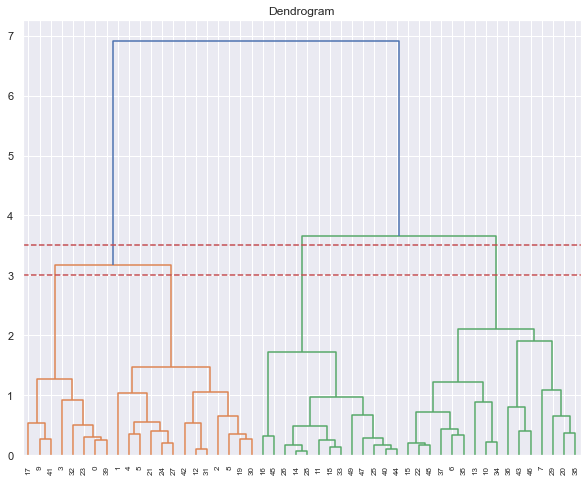

In [28]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(normalize_dataset,method='ward',metric='euclidean'))
plt.axhline(y=3.5, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')

## Building and Visualizing the different clustering models for different values of k

In [29]:
#when k=4
#We have four cluster now we will use Agglomerative Clustering
# Ward method is commanly used since it is simpler to visualize understanding.
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(normalize_dataset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime_data['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,9.481250,237.687500,79.562500,27.887500,0.0
1,4.533333,101.666667,68.866667,17.866667,1.0
2,13.500000,245.777778,53.111111,23.977778,2.0
3,4.820000,99.800000,49.300000,13.160000,3.0


In [30]:
df_0= crime_data.query('clust == 0')
print(pd.DataFrame(df_0))

            State  Murder  Assault  UrbanPop  Rape  clust
2         Arizona     8.1      294        80  31.0      0
4      California     9.0      276        91  40.6      0
5        Colorado     7.9      204        78  38.7      0
7        Delaware     5.9      238        72  15.8      0
8         Florida    15.4      335        80  31.9      0
12       Illinois    10.4      249        83  24.0      0
19       Maryland    11.3      300        67  27.8      0
20  Massachusetts     4.4      149        85  16.3      0
21       Michigan    12.1      255        74  35.1      0
24       Missouri     9.0      178        70  28.2      0
27         Nevada    12.2      252        81  46.0      0
29     New Jersey     7.4      159        89  18.8      0
30     New Mexico    11.4      285        70  32.1      0
31       New York    11.1      254        86  26.1      0
38   Rhode Island     3.4      174        87   8.3      0
42          Texas    12.7      201        80  25.5      0


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


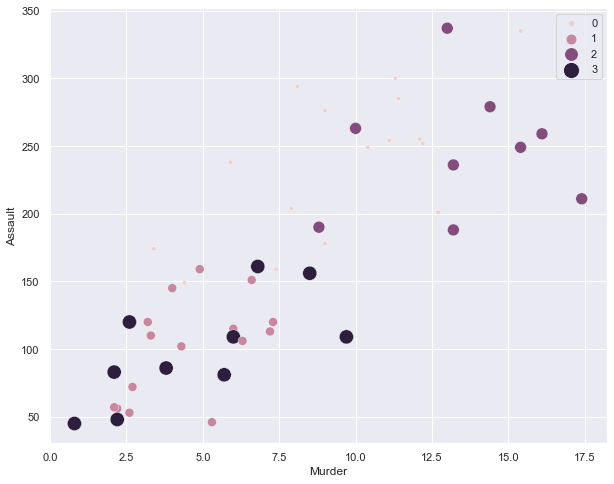

In [31]:
# Visualizing the clustering
colors=['green','red','blue','purple']
plt.figure(figsize =(10, 8))
sns.scatterplot(crime_data['Murder'], crime_data['Assault'], 
           hue = crime_data['clust'],cmap=matplotlib.colors.ListedColormap(colors),s=15, size=crime_data.clust, sizes=(20, 200), legend="full")
plt.legend()
plt.show()

In [32]:
#when k=3
#We have three cluster now we will use Agglomerative Clustering
# Ward method is commanly used since it is simpler to visualize understanding.
h_complete2 = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(normalize_dataset) 

cluster_labels2=pd.Series(h_complete2.labels_)
cluster_labels2
crime_data['clust2']=cluster_labels2 # creating a  new column and assigning it to new column 
crime_data.iloc[:,1:].groupby(crime_data.clust2).mean()

,Murder,Assault,UrbanPop,Rape,clust,clust2
clust2,,,,,,
0,4.64800,100.920000,61.040000,15.984000,1.8,0.0
1,9.48125,237.687500,79.562500,27.887500,0.0,1.0
2,13.50000,245.777778,53.111111,23.977778,2.0,2.0


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


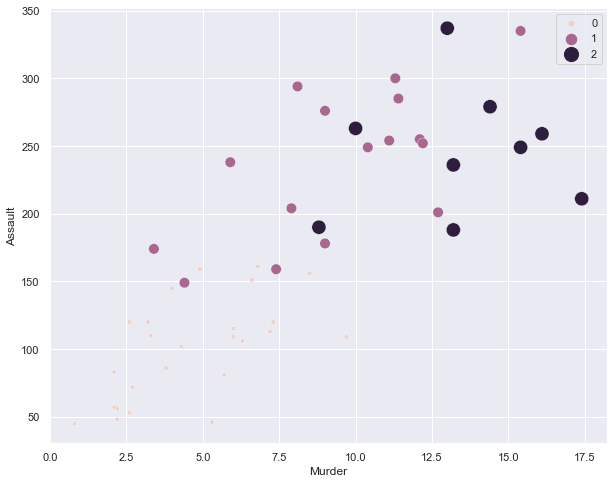

In [33]:
# Visualizing the clustering
colors=['green','red','blue','purple']
plt.figure(figsize =(10, 8))
sns.scatterplot(crime_data['Murder'], crime_data['Assault'], 
           hue = crime_data['clust2'],cmap=matplotlib.colors.ListedColormap(colors),s=15, size=crime_data.clust2, sizes=(20, 200), legend="full")
plt.legend()
plt.show()

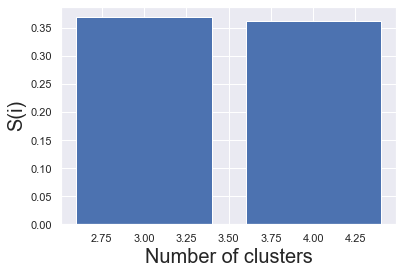

In [34]:
k = [3, 4]
cluster3 = AgglomerativeClustering(n_clusters = 3,linkage='ward',affinity='euclidean')
cluster4 = AgglomerativeClustering(n_clusters = 4,linkage='ward',affinity='euclidean')
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(normalize_dataset, cluster3.fit_predict(normalize_dataset)))
silhouette_scores.append(
        silhouette_score(normalize_dataset, cluster4.fit_predict(normalize_dataset)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

With the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 3 or 4. as there is no such big difference.

## K-means clustering

In [35]:
#WE fit K means using the transformed data
wcss=[]
for i in range(1,21):
    kmeans_data=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_data.fit(normalize_dataset)
    wcss.append(kmeans_data.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


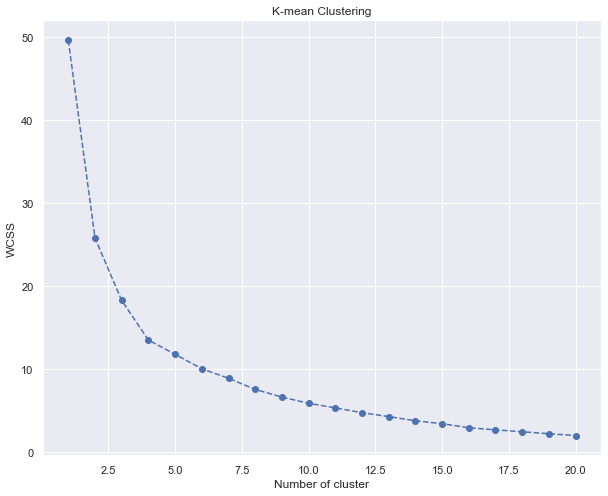

In [36]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a three-cluster solution.

In [37]:
#All left to do is to implement it.
#We have chosen three clusters, so we run K-means with number of clusters equals four.
#Same initilizer and random state as before.
kmeans_data=KMeans(n_clusters=3,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [38]:
#We fit our data with K-means model
kmeans_data.fit(normalize_dataset)

KMeans(n_clusters=3, random_state=0)

## Analyze the Results of K-Means Clustering

In [39]:
#The last column we add K-means clustering labels.
crime_data['K_means_segment']=kmeans_data.labels_
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape,clust,clust2,K_means_segment
0,Alabama,13.2,236,58,21.2,2,2,1
1,Alaska,10.0,263,48,44.5,2,2,1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,2,2,0
4,California,9.0,276,91,40.6,0,1,1


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


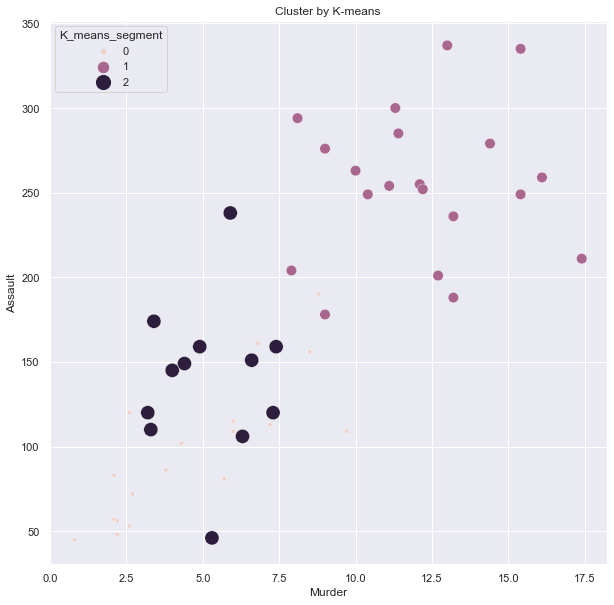

In [40]:
#let’s visualize the K-means clustering
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(crime_data['Murder'], crime_data['Assault'],hue=crime_data['K_means_segment'],
                cmap=matplotlib.colors.ListedColormap(colors),s=15,size=crime_data.K_means_segment, 
                sizes=(20, 200), legend="full")
plt.title('Cluster by K-means')
plt.show()

In [41]:
# As we passed n_cluster to be 4 we get 4 centres of the clusters
kmeans_data.cluster_centers_

array([[-0.32992986, -0.51025053, -0.41932283, -0.41188581],
       [ 0.47676261,  0.45084678,  0.1136795 ,  0.38588838],
       [-0.43734581, -0.27959282,  0.54386708, -0.14560849]])

In [42]:
crime_data.iloc[:,1:5].groupby(crime_data.K_means_segment).mean()

,Murder,Assault,UrbanPop,Rape
K_means_segment,,,,
0,4.672222,97.555556,54.500000,14.061111
1,12.165000,255.250000,68.400000,29.165000
2,5.166667,139.750000,77.333333,18.766667


## DBSCAN Clustering

For epsilon,K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(normalize_dataset)
distances, indices = nbrs.kneighbors(normalize_dataset)

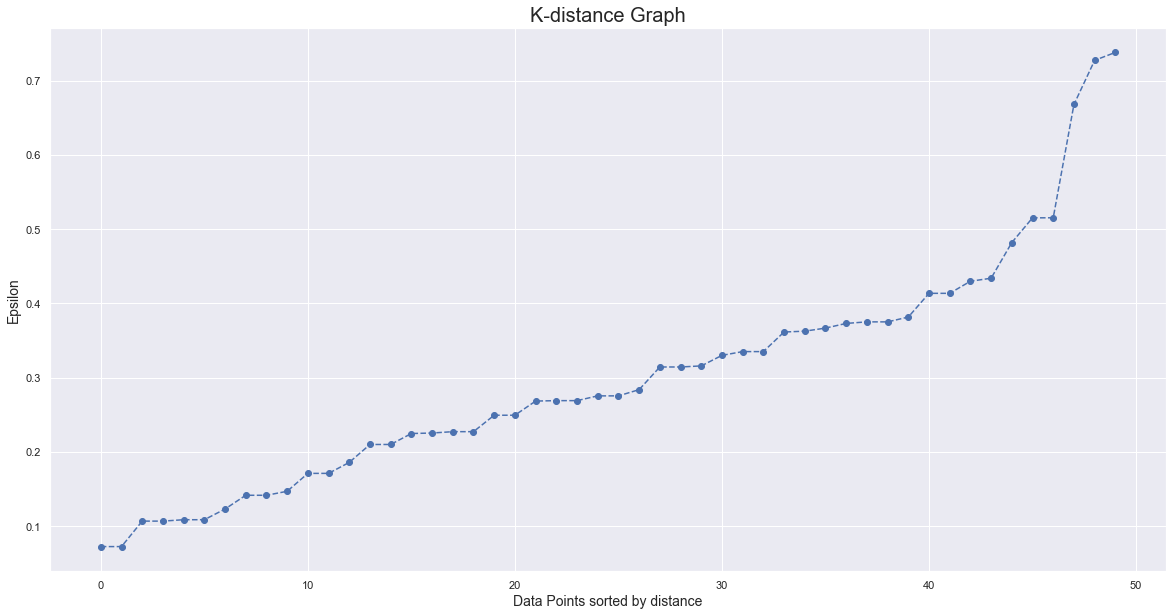

In [44]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances,marker='o',linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [45]:
dbscan_opt=DBSCAN(eps=0.5,min_samples=6,metric='euclidean')
dbscan_opt.fit(normalize_dataset)

DBSCAN(min_samples=6)

In [46]:
crime_data['DBSCAN_opt_labels']=dbscan_opt.labels_
crime_data['DBSCAN_opt_labels'].value_counts()

-1    22
 1    17
 0    11
Name: DBSCAN_opt_labels, dtype: int64

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


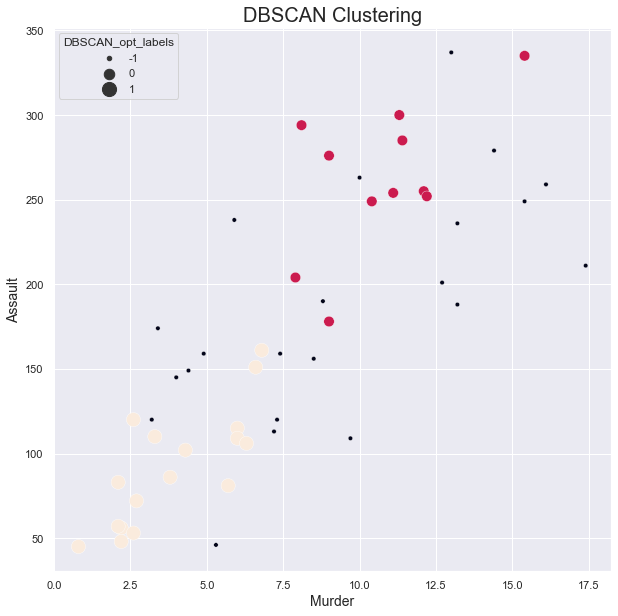

In [47]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
sns.scatterplot(crime_data['Murder'], crime_data['Assault'],c=crime_data['DBSCAN_opt_labels'],
                s=15,size=crime_data.DBSCAN_opt_labels, 
             sizes=(20, 200), legend="full")
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Murder',fontsize=14)
plt.ylabel('Assault',fontsize=14)
plt.show()

In [48]:
crime_data.iloc[:,1:5].groupby(crime_data.DBSCAN_opt_labels).mean()

,Murder,Assault,UrbanPop,Rape
DBSCAN_opt_labels,,,,
-1,9.336364,186.409091,65.863636,21.750000
0,10.718182,262.000000,78.181818,32.863636
1,3.888235,91.470588,56.941176,13.035294


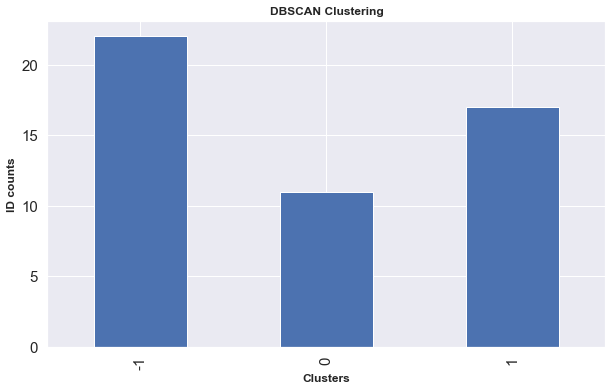

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
crime_data.groupby(['DBSCAN_opt_labels']).count()['State'].plot(kind='bar')
plt.ylabel('State Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

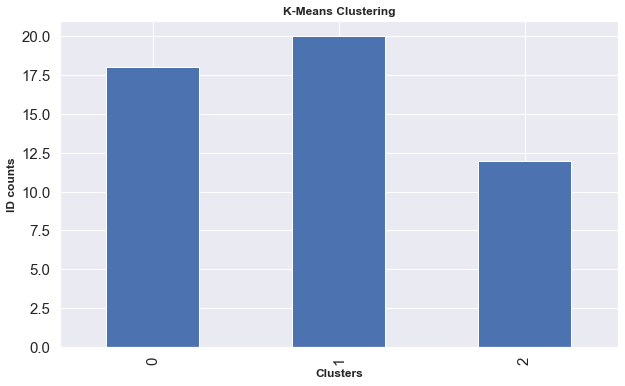

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
crime_data.groupby(['K_means_segment']).count()['State'].plot(kind='bar')
plt.ylabel('State Counts')
plt.title('K-Means Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

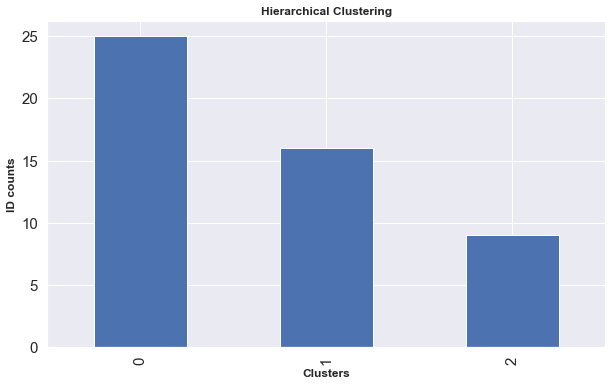

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
crime_data.groupby(['clust2']).count()['State'].plot(kind='bar')
plt.ylabel('State Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [52]:
crime_data

,State,Murder,Assault,UrbanPop,Rape,clust,clust2,K_means_segment,DBSCAN_opt_labels
0,Alabama,13.2,236,58,21.2,2,2,1,-1
1,Alaska,10.0,263,48,44.5,2,2,1,-1
2,Arizona,8.1,294,80,31.0,0,1,1,0
3,Arkansas,8.8,190,50,19.5,2,2,0,-1
4,California,9.0,276,91,40.6,0,1,1,0
5,Colorado,7.9,204,78,38.7,0,1,1,0
6,Connecticut,3.3,110,77,11.1,1,0,2,1
7,Delaware,5.9,238,72,15.8,0,1,2,-1
8,Florida,15.4,335,80,31.9,0,1,1,0
9,Georgia,17.4,211,60,25.8,2,2,1,-1


In [53]:
crime_data.iloc[:,1:5].groupby(crime_data.DBSCAN_opt_labels).mean()

,Murder,Assault,UrbanPop,Rape
DBSCAN_opt_labels,,,,
-1,9.336364,186.409091,65.863636,21.750000
0,10.718182,262.000000,78.181818,32.863636
1,3.888235,91.470588,56.941176,13.035294


In [54]:
crime_data.iloc[:,1:5].groupby(crime_data.K_means_segment).mean()

,Murder,Assault,UrbanPop,Rape
K_means_segment,,,,
0,4.672222,97.555556,54.500000,14.061111
1,12.165000,255.250000,68.400000,29.165000
2,5.166667,139.750000,77.333333,18.766667


In [55]:
crime_data.iloc[:,1:5].groupby(crime_data.clust2).mean()

,Murder,Assault,UrbanPop,Rape
clust2,,,,
0,4.64800,100.920000,61.040000,15.984000
1,9.48125,237.687500,79.562500,27.887500
2,13.50000,245.777778,53.111111,23.977778


Well we have divided the states on the basis of crime rate in the area Low, Medium and High. We performed three clustering methods to derive our concept and from all three Unsupervised clustering method K-Means clustering perform well on the datset.

Cluster1- High crime rate in all crimes. This group states needs to be watched and crimes needs to be low down.

Cluster2- Medium crime rate, as compared to the states in cluster1. These states needs to be taken care so that they cannot slips to cluster1, different government agencies should monitor.  

Cluster0- Low crime rate, as more features crime rate are low.